In [72]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress
from scipy import ndimage
from PIL import Image
import os
import glob


In [73]:
def plot(image):
    plt.figure(figsize=(8,12))
    plt.imshow(image, cmap='gray')
    plt.show()

In [74]:
import fitz
pdf_file = './licencjat.pdf'
doc = fitz.open(pdf_file)
zoom = 4
mat = fitz.Matrix(zoom, zoom)
pix = doc[48].get_pixmap(matrix=mat)
pix.save('image_with_table.png')

In [75]:
img = cv2.imread('./image_with_table.png')

In [76]:
img_copy = img.copy()

In [77]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [78]:
_, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

In [79]:
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [80]:
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if cv2.contourArea(contour) < 20000:
        cv2.rectangle(img_bin, (x, y), (x + w, y + h), (255, 255, 255), -1)

In [81]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

In [82]:
#usunięcie drobnych ubytków
img_bin = cv2.erode(img_bin, kernel, iterations=1)

In [83]:
img_bin = cv2.dilate(img_bin, kernel, iterations=1)

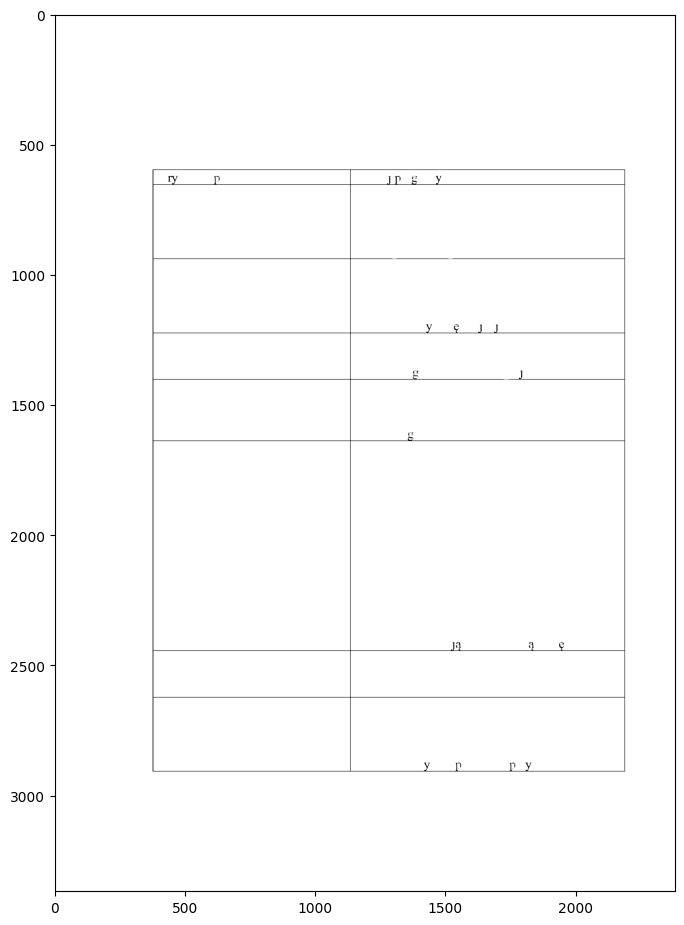

In [84]:
plot(img_bin)

In [85]:
img_bin = 255 - img_bin

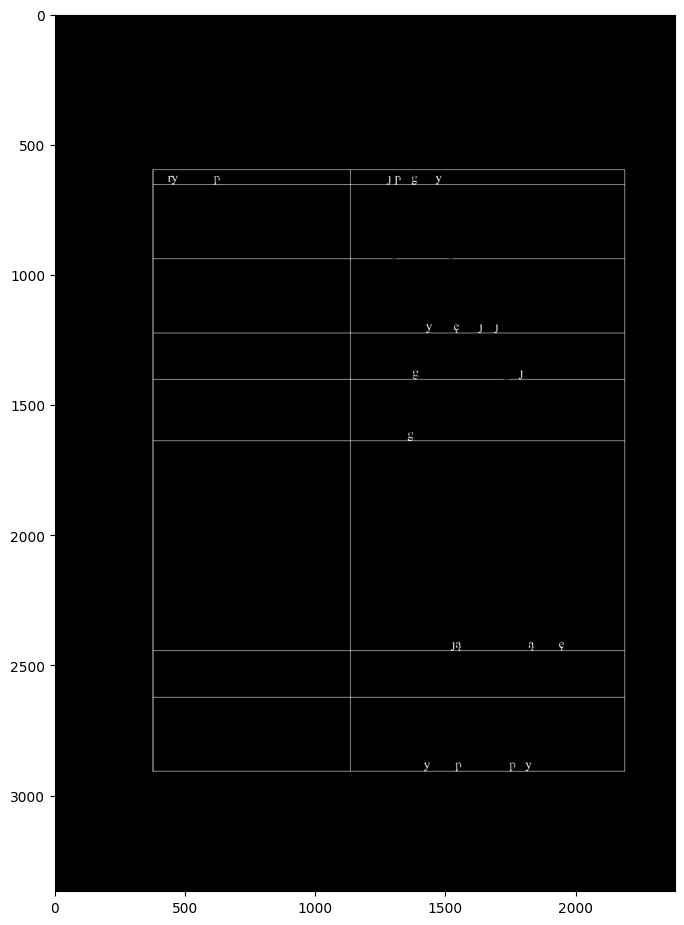

In [86]:
plot(img_bin)

In [87]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
horizontal_lines = cv2.erode(img_bin, horizontal_kernel, iterations=1)
horizontal_lines = cv2.dilate(horizontal_lines, horizontal_kernel, iterations=1)

In [88]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 6))
vertical_lines = cv2.erode(img_bin, vertical_kernel, iterations=1)
vertical_lines = cv2.dilate(vertical_lines, vertical_kernel, iterations=1)

In [89]:
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0)

In [90]:
_, img_vh = cv2.threshold(img_vh, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [91]:
contours, _ = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [92]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 15 and h > 15:
        cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255,0), 1)

In [93]:
cv2.imwrite('output.png', img_copy)

True

In [94]:
table_coordinates = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if cv2.contourArea(contour) >= 20000:
        table_coordinates.append((x, y, w, h))

In [95]:
table_coordinates

[(375, 597, 1816, 2314),
 (1135, 2624, 1054, 284),
 (377, 2624, 758, 284),
 (1135, 2445, 1054, 179),
 (377, 2445, 758, 179),
 (1135, 1639, 1054, 806),
 (377, 1639, 758, 806),
 (1135, 1403, 1054, 236),
 (377, 1403, 758, 236),
 (1135, 1225, 1054, 179),
 (377, 1225, 758, 178),
 (1135, 940, 1054, 285),
 (377, 940, 758, 285),
 (1135, 655, 1054, 286),
 (377, 655, 758, 285),
 (1135, 598, 1054, 57),
 (377, 598, 758, 57)]

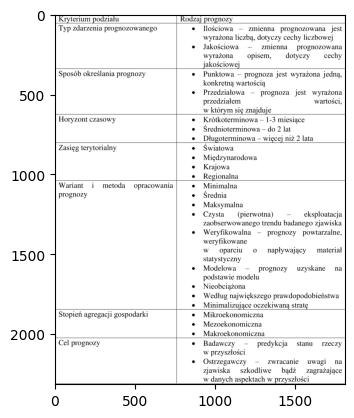

In [97]:
x,y,w,h = (375, 597, 1816, 2314)
plt.imshow(img[y:y+h, x:x+w])

In [99]:
from itertools import combinations

class Solution(object):
    def validPath(self, n, edges, source, destination):
        """
        :type n: int
        :type edges: List[List[int]]
        :type source: int
        :type destination: int
        :rtype: bool
        """
        # edges = 

In [101]:
list(combinations(range(3), 2))

[(0, 1), (0, 2), (1, 2)]